<a href="https://colab.research.google.com/github/Kiritthika03/Bank-churning-/blob/main/Banking_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Prediction 🔍

Welcome to this project where we aim to **predict whether a bank customer will churn or not**, using a dataset containing real-world banking features.

---

## Objective
The main goal of this notebook is to build a machine learning model that can **predict customer churn** based on historical data. This is crucial for banks to take preventive measures and retain valuable customers.

---

##  Dataset Overview
The dataset contains **10,000 bank customer records** with the following types of features:

- **Demographic Info**: `Geography`, `Gender`, `Age`
- **Account Details**: `CreditScore`, `Balance`, `EstimatedSalary`, `Tenure`
- **Engagement Metrics**: `NumOfProducts`, `IsActiveMember`, `HasCrCard`
- **Target Variable**: `Exited` (1 = Churned, 0 = Stayed)

🔗 [Kaggle Dataset Link](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction)

---

##  What We'll Do
- Perform **Exploratory Data Analysis (EDA)**
- Handle **missing values**, **outliers**, and **feature scaling**
- Build multiple classification models including:
  - Artificial Neural Network (ANN)
- Evaluate models using **accuracy score**
- Identify key factors contributing to customer churn

---

Let's get started! 🚀


# **Read the data**

In [174]:
import pandas as pd
import numpy as np

In [175]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [176]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


# 🔍 **Exploratory Data Analysis (EDA)**

In this section, we will focus on gaining insights from the data and preparing it for modeling. Here's what we'll cover:

1. **Handling missing values** (if any)
2. **Normalizing key features** such as `CreditScore`, `Balance`, and `EstimatedSalary`
3. **Visualizing the data** through various plots to understand patterns, distributions, and relationships


In [177]:
data = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [178]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [179]:
data.isnull().sum()

,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1
IsActiveMember,1
EstimatedSalary,0


### 1.  Handling Missing Values

There were only a few missing values (around 1–2), so we handled them using `dropna()` from the pandas library. This method helps remove all rows containing missing values without significantly affecting the dataset, especially when the amount of missing data is minimal.


In [180]:
data.dropna(inplace= True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


# **Normalizing the Values:**

In this step, we will normalize the features so that the mean becomes 0 and the standard deviation becomes 1. This helps maintain a consistent scale across features, which allows the model to make better predictions.


In [181]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data[['CreditScore','Balance','EstimatedSalary']] = mm.fit_transform(data[['CreditScore','Balance','EstimatedSalary']])

In [182]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,42.0,2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,Spain,Female,41.0,1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,France,Female,42.0,8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,France,Female,39.0,1,0.000000,2,0.0,0.0,0.469120,0
5,0.590,Spain,Male,44.0,8,0.453394,2,1.0,0.0,0.748797,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,France,Female,36.0,7,0.000000,1,0.0,1.0,0.210390,1
9998,0.844,Germany,Male,42.0,3,0.299226,2,1.0,0.0,0.464429,1
9999,0.844,Germany,Male,42.0,3,0.299226,2,1.0,0.0,0.464429,1
10000,0.884,France,Female,28.0,4,0.518708,1,1.0,0.0,0.190914,0


EDA

In [183]:
def absolute_value(val):
    total = len(data['Geography'])
    count = int(round(val / 100 * total))
    return str(count)

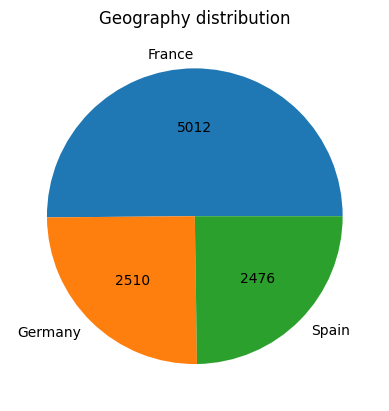

In [184]:
import matplotlib.pyplot as plt
geo = data['Geography'].value_counts()
plt.pie(geo,labels=geo.index,autopct=absolute_value)
plt.title("Geography distribution")
plt.show()

# **Interpretation:**
The pie chart indicates that the majority of customers belong to France, with a total of 5,012 accounts. Germany and Spain follow closely, with 2,510 and 2,476 customers respectively.

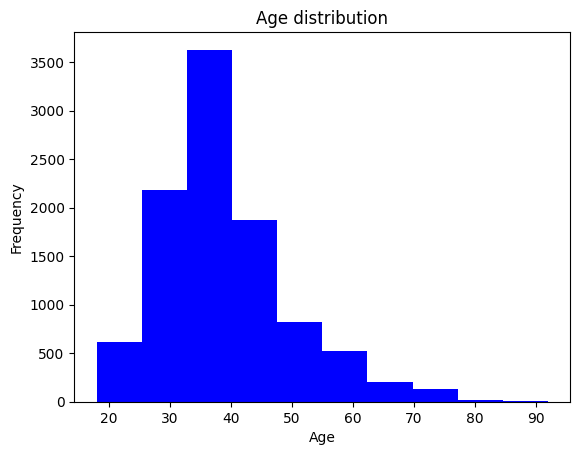

In [185]:
plt.hist(data['Age'], bins = 10,color='blue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Interpration:**
Most customers are between 30 and 40 years old, making it the most common age group in the dataset.

The distribution is right-skewed (positively skewed), meaning there are more younger customers and fewer older ones.Very few customers are above age 60.

In [186]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,42.0,2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,Spain,Female,41.0,1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,France,Female,42.0,8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,France,Female,39.0,1,0.000000,2,0.0,0.0,0.469120,0
5,0.590,Spain,Male,44.0,8,0.453394,2,1.0,0.0,0.748797,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,France,Female,36.0,7,0.000000,1,0.0,1.0,0.210390,1
9998,0.844,Germany,Male,42.0,3,0.299226,2,1.0,0.0,0.464429,1
9999,0.844,Germany,Male,42.0,3,0.299226,2,1.0,0.0,0.464429,1
10000,0.884,France,Female,28.0,4,0.518708,1,1.0,0.0,0.190914,0


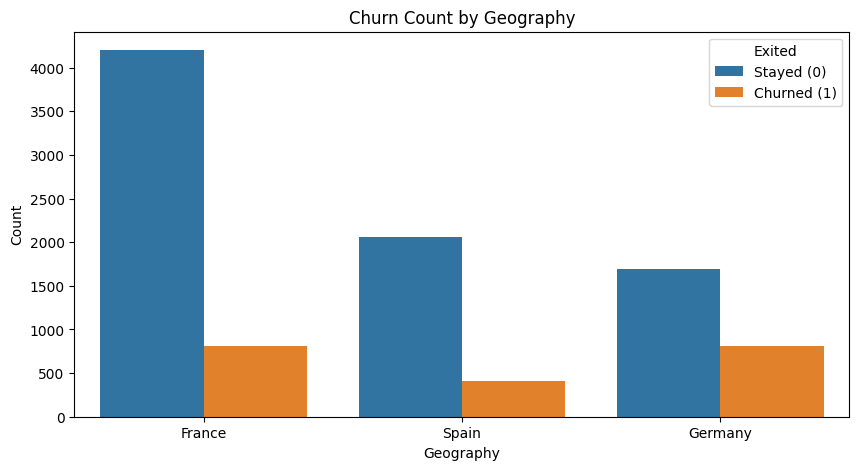

In [187]:

plt.figure(figsize=(10, 5))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Churn Count by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

# **Interpretation: Churn Count by Geography**
As the graph shows, France has the highest number of total customers, with over 4,000 staying loyal (Exited = 0).

In contrast, Germany has the highest number of churned customers (Exited = 1), despite having fewer total customers than France or Spain.

Spain has a relatively balanced churn pattern, with fewer total customers and fewer churns compared to the other two regions.

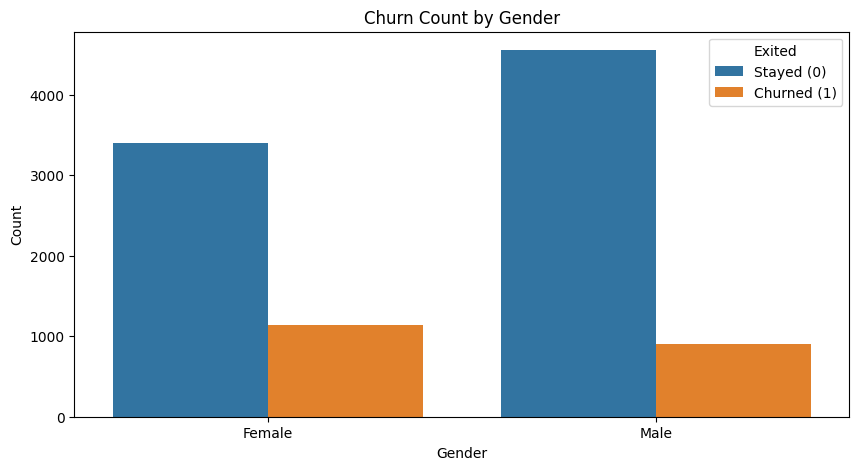

In [188]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

# **Interpretation: Churn Count by Gender**
The chart shows that more males stayed with the bank compared to females.

Although the total number of male customers is higher, the churn count is noticeably higher among females.

This suggests that female customers may be more likely to leave the bank, indicating a potential difference in satisfaction or engagement levels between genders.

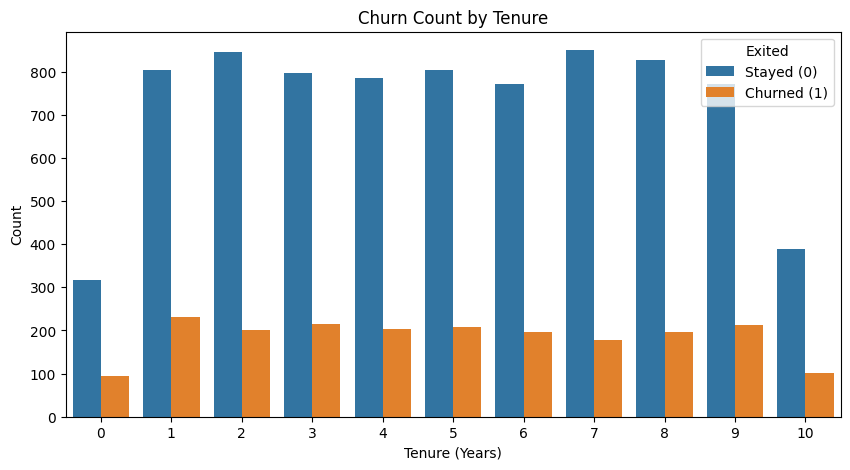

In [189]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Tenure', hue='Exited', data=data)
plt.title('Churn Count by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()

# **Interpretation: Churn count by Tenure**
1. Customers with a tenure of 7 years show the highest loyalty, with the largest number of them staying with the bank.
2. Churn does not follow a clear increasing or decreasing trend with tenure, suggesting that factors other than tenure (like age, product usage, or service satisfaction) may play a more influential role.

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

In [191]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,42.0,2,0.000000,1,1.0,1.0,0.506735,1
1,0.516,2,0,41.0,1,0.334031,1,0.0,1.0,0.562709,0
2,0.304,0,0,42.0,8,0.636357,3,1.0,0.0,0.569654,1
3,0.698,0,0,39.0,1,0.000000,2,0.0,0.0,0.469120,0
5,0.590,2,1,44.0,8,0.453394,2,1.0,0.0,0.748797,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,0,0,36.0,7,0.000000,1,0.0,1.0,0.210390,1
9998,0.844,1,1,42.0,3,0.299226,2,1.0,0.0,0.464429,1
9999,0.844,1,1,42.0,3,0.299226,2,1.0,0.0,0.464429,1
10000,0.884,0,0,28.0,4,0.518708,1,1.0,0.0,0.190914,0


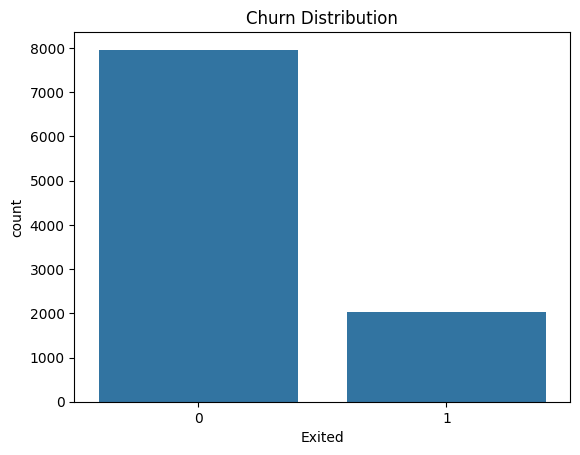

In [192]:
import seaborn as sns
sns.countplot(x = 'Exited', data = data)
plt.title('Churn Distribution')
plt.show()

# **Interpretation: Overall churn Distributtion.**

1. The graph shows that a majority of customers (over 7000) have stayed with the bank indicating strong overall customer retention

2. A smaller portion around 2000 customers have churned

3. While the bank has mainted loyalty among a large portion of customers, the churned group still represents a significant business loss nearly 20% of the total customer base.

<Axes: >

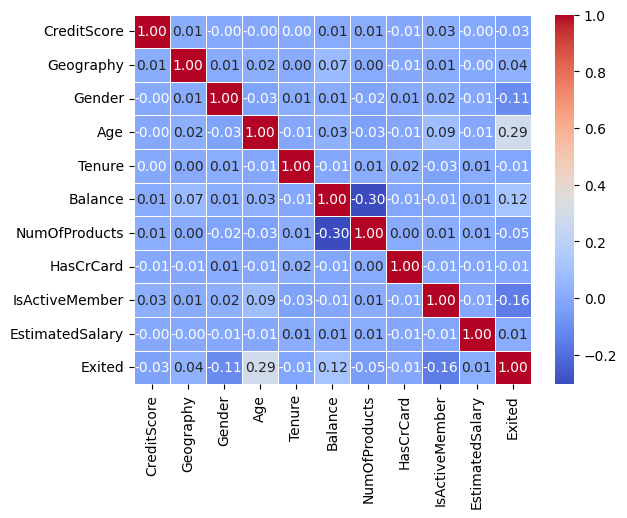

In [193]:
import seaborn as sns
sns.heatmap(data.corr(),annot = True, cmap = 'coolwarm',fmt=".2f", linewidths=0.5)

# **Interpretation: Correlation Heatmap**
1. Age and Balance have a positive correlation with the target variable Exited, suggesting that older customers and those with higher balances are slightly more likely to churn.

2. Gender and IsActiveMember show a negative correlation with Exited, indicating that male customers and active members are less likely to churn.

3. Most of the remaining features (e.g., CreditScore, Tenure, HasCrCard, EstimatedSalary) have very weak or negligible correlation with churn.

4. Notably, Balance and NumOfProducts have a moderately strong negative correlation (-0.30), which may suggest potential multicollinearity. This should be considered when selecting features for certain models like logistic regression.

Text(0.5, 1.0, 'PCA Visualization')

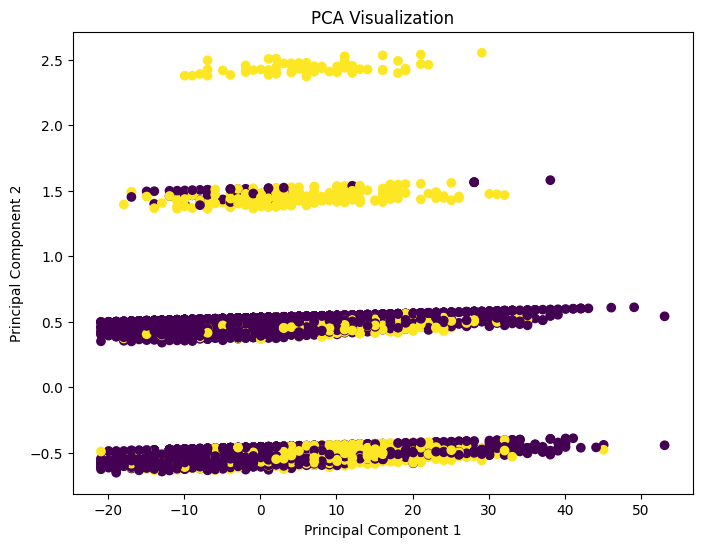

In [194]:
from sklearn.decomposition import PCA

X = data[['CreditScore','Age','Balance','IsActiveMember','NumOfProducts']]
y = data['Exited']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')

# **PCA Visualization Interpretation**

1. The PCA plot was generated to reduce the dataset into two principal components and visualize its structure in 2D space.

2. This visualization helps us assess whether the data distribution is linearly separable or not.

3. Based on the scatter of points:

- There is no clear linear boundary between the two classes (yellow and purple), indicating that the data is likely non-linear in nature.

- This suggests that linear models (like Logistic Regression) may struggle to classify the data accurately, and non-linear models (such as Random Forest, SVM with kernels, or Neural Networks) may perform better.

## **Building an Artificial Neural Network (ANN) for Churn Prediction**


 ***Background***

As observed in the earlier PCA visualization, the dataset is **non-linear in nature**. This implies that linear models like logistic regression may not perform well. Therefore, we'll build an **Artificial Neural Network (ANN)** to model complex patterns and predict customer churn effectively.



 ***Step-by-Step Process***

1. **Data Preparation**
- Split the dataset into:
  - `xtrain`, `xtest`, `ytrain`, `ytest`
- Convert the data into **tensors** so the model can process it.
- Use `TensorDataset` to combine input and output pairs.
- Wrap the datasets in a **DataLoader** for better batch processing and memory efficiency.



2. **Model Architecture**
- Input Layer: Based on the number of features
- Hidden Layers:
  - 3 layers using **ReLU activation**
- Output Layer:
  - 1 neuron with **Sigmoid activation** (since it’s a binary classification problem)


3. **Loss Function, Optimizer, and Epochs**
- **Loss Function**: `nn.BCELoss()` — Binary Cross Entropy for binary classification
- **Optimizer**: `Adam` — efficient and adaptive optimizer
- **Epochs**: 100



4. **Why ANN?**
Artificial Neural Networks are capable of learning complex, non-linear relationships in data. Given our PCA findings, an ANN is well-suited for this classification task.

In [195]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.2, random_state = 42)

In [196]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [197]:
xtrain = torch.tensor(xtrain.values, dtype=torch.float32)
ytrain = torch.tensor(ytrain.values, dtype=torch.float32)
xtest = torch.tensor(xtest.values, dtype=torch.float32)
ytest = torch.tensor(ytest.values, dtype=torch.float32)

In [198]:
train_dataset = TensorDataset(xtrain, ytrain.view(-1, 1))  # Ensure ytrain is 2D
test_dataset = TensorDataset(xtest, ytest.view(-1, 1))


In [199]:
trainloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
testloader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [200]:
class churnANN(nn.Module):
  def __init__(self, input_size):
    super(churnANN,self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,32)
    self.output = nn.Linear(32,1)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.sigmoid(self.output(x))
    return x

In [201]:
input_size = xtrain.shape[1]
model = churnANN(input_size)
print(model)

churnANN(
  (fc1): Linear(in_features=5, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)


In [202]:
ls = nn.BCELoss()
opt = optim.Adam(model.parameters(), lr=0.01)

In [203]:
epochs = 100

for epoch in range(epochs):
    model.train()
    epoch_loss = 0

    for batch_x, batch_y in trainloader:
        output = model(batch_x)
        loss = ls(output, batch_y)

        opt.zero_grad()
        loss.backward()
        opt.step()

        epoch_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        avg_loss = epoch_loss / len(trainloader)
        print(f'Epoch [{epoch+1}/{epochs}], Avg Loss: {avg_loss:.4f}')

Epoch [10/100], Avg Loss: 0.4233
Epoch [20/100], Avg Loss: 0.3832
Epoch [30/100], Avg Loss: 0.3705
Epoch [40/100], Avg Loss: 0.3728
Epoch [50/100], Avg Loss: 0.3676
Epoch [60/100], Avg Loss: 0.3745
Epoch [70/100], Avg Loss: 0.3765
Epoch [80/100], Avg Loss: 0.3805
Epoch [90/100], Avg Loss: 0.3657
Epoch [100/100], Avg Loss: 0.3650


In [204]:
all_preds = []
all_labels = []
with torch.no_grad():
    for batch_x, batch_y in testloader:
        outputs = model(batch_x)  # sigmoid included inside model
        preds = torch.round(outputs).view(-1)       # flatten predictions
        labels = batch_y.view(-1)                   # flatten labels

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())


In [205]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(all_labels, all_preds))


Accuracy: 0.84


*With an accuracy of 84%, the model demonstrates a solid capability in classifying churn behavior, making it a reliable choice for further evaluation and deployment*